In [1]:
!pip install -q -U autogluon.tabular catboost lightgbm xgboost

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')

In [4]:
train.shape, test.shape

((1117957, 90), (745305, 89))

In [5]:
_train, _val = train_test_split(
    train, 
    test_size=0.1, 
    random_state=seed
)

In [6]:
_train = TabularDataset(_train)
_val = TabularDataset(_val)
test = TabularDataset(test)

# Training

In [7]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=_train,
    time_limit=3600 * 10,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    keep_only_best=True,
    hyperparameter_tune_kwargs={  
        'num_trials': 25,
        'scheduler' : 'local',
        'searcher'  : 'bayes'
    },
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240516_091526"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 36000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240516_091526/ds_sub_fit/sub_fit_ho.
2024-05-16 09:15:27,406	INFO util.py:124 -- Outdated packages:
  ipywidgets==

  0%|          | 0/25 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.00114929	valid_set's r2: -80.855
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[7]	valid_set's l2: 0.00123877	valid_set's r2: -80.8488
	Ran out of time, early stopping on iteration 8. Best iteration is:
	[8]	valid_set's l2: 0.0011187	valid_set's r2: -81.8342
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.0010254	valid_set's r2: -81.1789
	Ran out of time, early stopping on iteration 8. Best iteration is:
	[8]	valid_set's l2: 0.00112958	valid_set's

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[5]	valid_set's l2: 0.00171007	valid_set's r2: -80.9172
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[5]	valid_set's l2: 0.0016937	valid_set's r2: -81.8302
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[5]	valid_set's l2: 0.00170216	valid_set's r2: -81.3105
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[5]	valid_set's l2: 0.00170666	valid_set's r2: -81.0256
	Ran out of time, early stopping on iteration 10. Best iteration is:
	[5]	valid_set's l2: 0.00169897	valid_set's r2: -81.5141
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.00107929	valid_set's r2: -81.1828
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[11]	valid_set's l2: 0.00106916	valid_set's r2: -82.0156
	Ran out of time, early stopping 

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 15.
	Ran out of time, early stopping on iteration 18.
	Ran out of time, early stopping on iteration 20.
	Ran out of time, early stopping on iteration 20.
	Ran out of time, early stopping on iteration 21.
	Ran out of time, early stopping on iteration 23.
	Ran out of time, early stopping on iteration 26.
	Ran out of time, early stopping on iteration 33.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.7502	 = Validation score   (r2)
	74.73s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 84.31s of the 8712.89s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 84.31s of the 8613.93s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with Sequenti

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239371	valid_set's r2: -91.2319
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00231015	valid_set's r2: -88.8246
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239415	valid_set's r2: -91.2319
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258211	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterat

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238861	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00230334	valid_set's r2: -89.3875
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238889	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258146	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterat

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 10.
	Ran out of time, early stopping on iteration 11.
	Ran out of time, early stopping on iteration 13.
	Ran out of time, early stopping on iteration 17.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.3449	 = Validation score   (r2)
	59.4s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 68.15s of the 4410.34s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/auto

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 68.15s of the 4313.79s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00247535	valid_set's r2: -94.012
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 68.15s of the 4301.51s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on the

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 55. Best iteration is:
	[55]	valid_set's l2: 0.000371695	valid_set's r2: -81.2965
	Ran out of time, early stopping on iteration 59. Best iteration is:
	[59]	valid_set's l2: 0.000371	valid_set's r2: -81.0372
	Ran out of time, early stopping on iteration 59. Best iteration is:
	[58]	valid_set's l2: 0.000372211	valid_set's r2: -81.8225
	Ran out of time, early stopping on iteration 62. Best iteration is:
	[62]	valid_set's l2: 0.000364309	valid_set's r2: -81.6411
	Ran out of time, early stopping on iteration 66. Best iteration is:
	[65]	valid_set's l2: 0.000365179	valid_set's r2: -80.97
	Ran out of time, early stopping on iteration 70. Best iteration is:
	[70]	valid_set's l2: 0.000359093	valid_set's r2: -81.4567
	Ran out of time, early stopping on iteration 78. Best iteration is:
	[76]	valid_set's l2: 0.000361301	valid_set's r2: -81.011
	Ran out of time, earl

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	178.32s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 263.42s of the 27654.21s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1334, in _hyperparameter_tune
    hpo_executor.validate_search_space(search_space, self.name)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/hpo/executors.py", line 512, in validate_search_space
    raise EmptySearchSpace
autogluon.core.hpo.exceptions.EmptySearchSpace

During handling of the above exception, ano

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 68.
	Ran out of time, early stopping on iteration 71.
	Ran out of time, early stopping on iteration 75.
	Ran out of time, early stopping on iteration 76.
	Ran out of time, early stopping on iteration 77.
	Ran out of time, early stopping on iteration 72.
	Ran out of time, early stopping on iteration 96.
	Ran out of time, early stopping on iteration 119.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8648	 = Validation score   (r2)
	247.2s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 263.42s of the 27364.75s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
	Not enough time to generate out-of-fold predictions for model. Estimated time 

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8671	 = Validation score   (r2)
	249.86s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 263.42s of the 26837.91s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 36. Best iteration is:
	[20]	valid_set's l2: 0.00100763	valid_set's r2: -81.274
	Ran out of time, early stopping on iteration 38. Best iteration is:
	[20]	valid_set's l2: 0.00101238	valid_set's r2: -81.0178
	Ran out of time, early stopping on iteration 40. Best iteration is:
	[21]	valid_set's l2: 0.000968571	valid_set's r2: -81.7855
	Ran out of time, early stopping on iteration 40. Best iteration is:
	[20]	valid_set's l2: 0.00100549	valid_set's r2: -81.6237
	Ran out of time, early stopping on it

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 21. Best iteration is:
	[21]	valid_set's l2: 0.00062213	valid_set's r2: -81.0683
	Ran out of time, early stopping on iteration 19. Best iteration is:
	[18]	valid_set's l2: 0.000716178	valid_set's r2: -81.4564
	Ran out of time, early stopping on iteration 21. Best iteration is:
	[21]	valid_set's l2: 0.00061938	valid_set's r2: -81.1199
	Ran out of time, early stopping on iteration 23. Best iteration is:
	[23]	valid_set's l2: 0.000568873	valid_set's r2: -81.4269
	Ran out of time, early stopping on iteration 24. Best iteration is:
	[21]	valid_set's l2: 0.000617762	valid_set's r2: -81.7858
	Ran out of time, early stopping on iteration 25. Best iteration is:
	[25]	valid_set's l2: 0.000529127	valid_set's r2: -81.2079
	Ran out of time, early stopping on iteration 27. Best iteration is:
	[19]	valid_set's l2: 0.000680443	valid_set's r2: -81.217
	Ran out of time, e

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[13]	valid_set's l2: 0.00094076	valid_set's r2: -81.0578
	Ran out of time, early stopping on iteration 15. Best iteration is:
	[13]	valid_set's l2: 0.000937433	valid_set's r2: -81.4536
	Ran out of time, early stopping on iteration 15. Best iteration is:
	[13]	valid_set's l2: 0.000938833	valid_set's r2: -81.112
	Ran out of time, early stopping on iteration 16. Best iteration is:
	[11]	valid_set's l2: 0.00107264	valid_set's r2: -81.4242
	Ran out of time, early stopping on iteration 16. Best iteration is:
	[11]	valid_set's l2: 0.00106928	valid_set's r2: -81.7858
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[13]	valid_set's l2: 0.000938482	valid_set's r2: -81.2036
	Ran out of time, early stopping on iteration 19. Best iteration is:
	[13]	valid_set's l2: 0.000937614	valid_set's r2: -81.217
	Ran out of time, ear

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 27.
	Ran out of time, early stopping on iteration 28.
	Ran out of time, early stopping on iteration 29.
	Ran out of time, early stopping on iteration 30.
	Ran out of time, early stopping on iteration 27.
	Ran out of time, early stopping on iteration 34.
	Ran out of time, early stopping on iteration 37.
	Ran out of time, early stopping on iteration 45.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.8228	 = Validation score   (r2)
	195.6s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 208.68s of the 13609.99s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packag

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 208.68s of the 13367.86s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with Sequen

In [8]:
X_train = _train.drop('FloodProbability', axis=1)
y_train = _train['FloodProbability']

y_preds = predictor.predict(X_train)

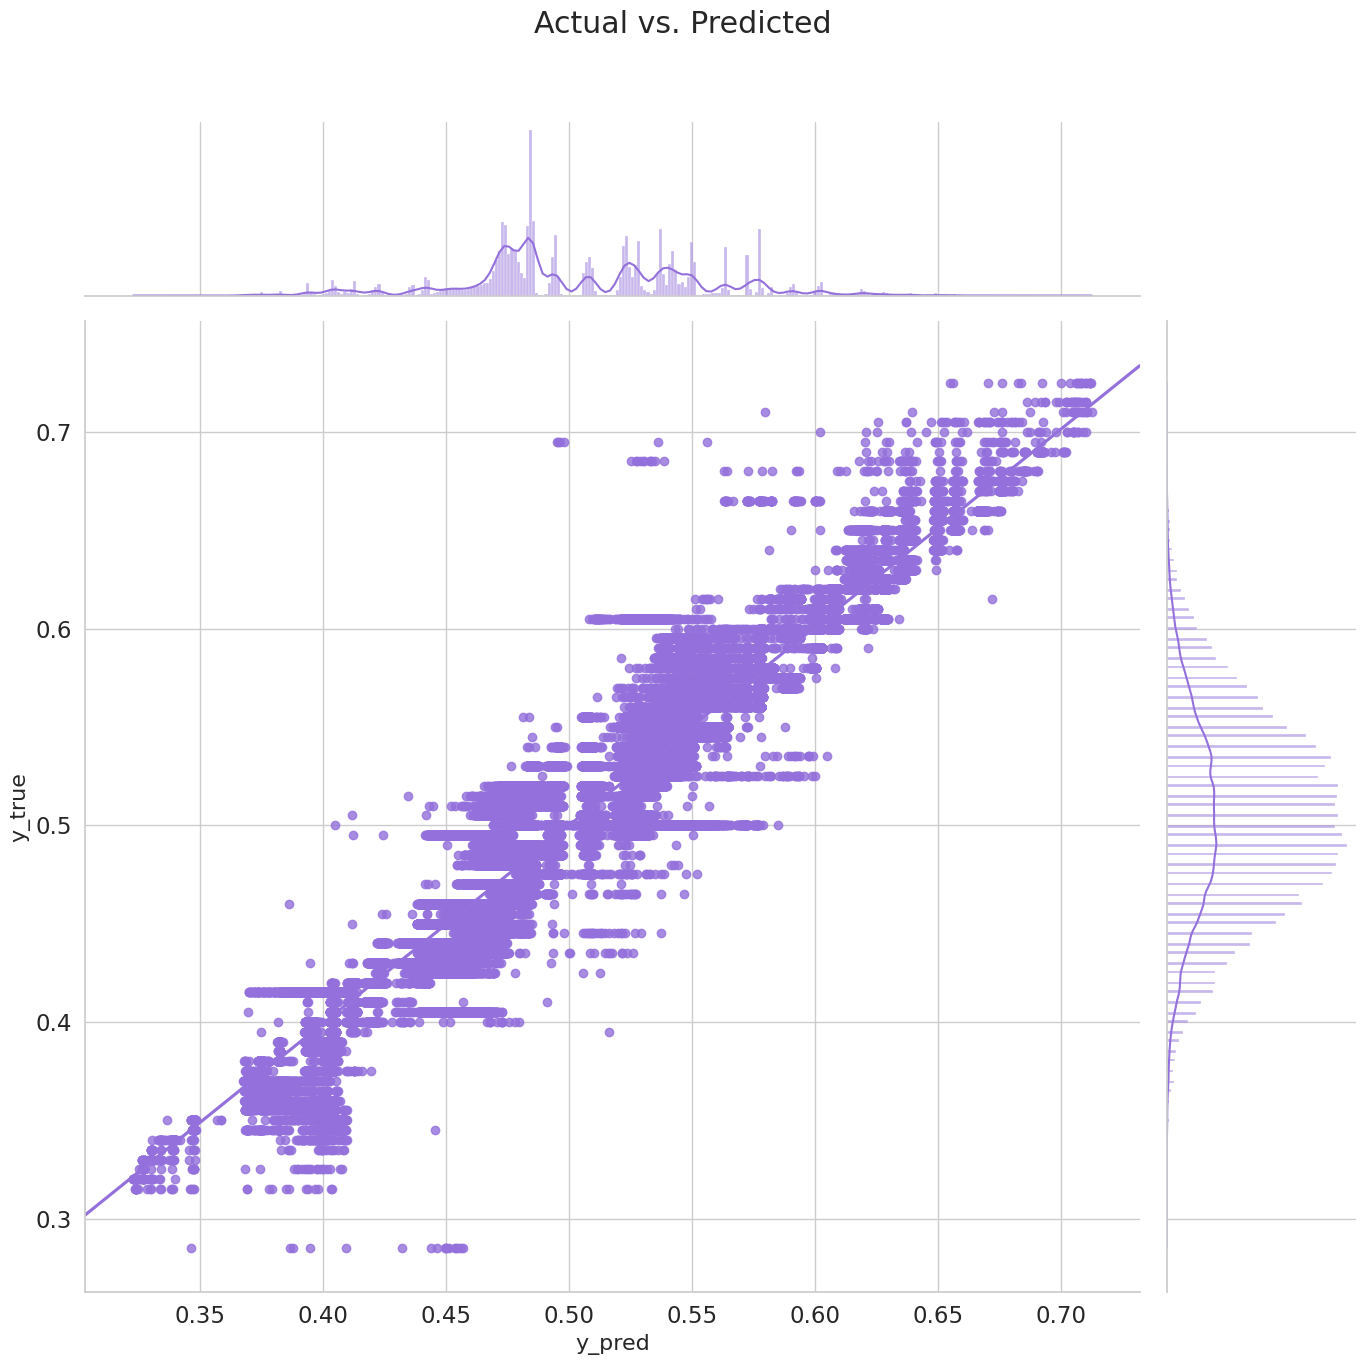

In [9]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Visualizing the Results

In [10]:
score = predictor.evaluate(_val, silent=True)['r2']

In [11]:
print(f"Validation R2 Score: {score}")

Validation R2 Score: 0.8693550608807535


In [12]:
fi = predictor.feature_importance(data=_val, silent=True)
lb = predictor.leaderboard(_val, silent=True)

These features in provided data are not utilized by the predictor and will be ignored: ['_sort_0', '_sort_19', '_50th', '_cnt18', '_cnt19', '_cnt22']


In [13]:
lb.style.background_gradient(subset=['score_val', 'score_test'], cmap='RdYlGn')

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.869355,0.869240,r2,74.400018,1.439784,11712.103791,0.004215,0.009859,3.194436,3,True,50
1,XGBoost_r194_BAG_L1,0.869240,0.869124,r2,0.782923,0.002805,249.678648,0.782923,0.002805,249.678648,1,True,18
2,CatBoost_r6_BAG_L2,0.869123,0.868857,r2,74.395803,1.429924,11708.909355,0.566260,0.002036,198.825456,2,True,49
3,ExtraTrees_r42_BAG_L1,0.868639,0.867660,r2,0.707555,0.001834,275.037636,0.707555,0.001834,275.037636,1,True,11
4,CatBoost_r180_BAG_L1,0.868377,0.868359,r2,0.639716,0.002272,248.206674,0.639716,0.002272,248.206674,1,True,42
5,ExtraTrees_r178_BAG_L1,0.868232,0.866917,r2,0.731071,0.002050,272.265306,0.731071,0.002050,272.265306,1,True,35
6,CatBoost_r6_BAG_L1,0.868201,0.868231,r2,0.734277,0.002043,248.755164,0.734277,0.002043,248.755164,1,True,40
7,CatBoost_r50_BAG_L1,0.867993,0.868053,r2,0.723713,0.001980,248.743134,0.723713,0.001980,248.743134,1,True,17
8,CatBoost_r167_BAG_L1,0.867992,0.868035,r2,0.248276,0.002166,248.353335,0.248276,0.002166,248.353335,1,True,23
9,CatBoost_r163_BAG_L1,0.867978,0.868027,r2,0.233720,0.002311,248.722459,0.233720,0.002311,248.722459,1,True,44


In [14]:
fi.style.background_gradient(cmap='RdYlGn')

,importance,stddev,p_value,n,p99_high,p99_low
_sum,1.033720,0.011703,0.000000,5,1.057817,1.009623
_sum_log,0.010553,0.000451,0.000000,5,0.011482,0.009624
_mean,0.010296,0.000484,0.000001,5,0.011292,0.009299
_entropy,0.002233,0.000373,0.000090,5,0.003001,0.001465
_max,0.000906,0.000262,0.000752,5,0.001445,0.000367
_special1,0.000874,0.000163,0.000137,5,0.001209,0.000540
_cnt15,0.000394,0.000158,0.002545,5,0.000720,0.000068
_2nd_moment,0.000386,0.000163,0.003081,5,0.000722,0.000050
_gmean,0.000253,0.000211,0.027496,5,0.000688,-0.000181
_skew,0.000242,0.000145,0.010167,5,0.000541,-0.000057


# Making Predictions and Creating a Submission File

In [15]:
preds = predictor.predict(test)

In [16]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv(f'autogluon-{score:.6f}.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.577843
1117958,1117958,0.455894
1117959,1117959,0.446478
1117960,1117960,0.466778
1117961,1117961,0.467621


In [17]:
shutil.rmtree("AutogluonModels")